# Linear Regression Model  with Medical Charges


This kernel hopes to accomplish many goals, to name a few...
* Do a comprehensive data analysis along with visualizations. 
* Create models that are well equipped to predict better medical Charges for patients


# Introduction
 Hospital and Medical charges is a part of our finances for all age groups, this kernel attempts to generate a Linear_regression model for predicting the charges for patients

#  Importing Necessary Libraries 

In [3]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%matplotlib widget


In [4]:
sns.set_style('darkgrid')  # Setting the Visusalzation style
plt.rcParams['figure.figsize'] = (10,6) 
pd.set_option('display.float_format', lambda x:'%.3f' % x) # Displaying digits in original format

# Importing dataset

In [5]:
#importing Data set
df_med = pd.read_csv("C:\\Users\\hp\\Documents\\medfile.csv")

In [6]:
df_med

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945


# Data Cleaning

In [7]:
#checking for Duplicates
df_med.duplicated().sum()

1

In [8]:
df_med[df_med.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.563


In [9]:
df_med.nunique().sum()

1946

In [10]:
#checking for missing values 
df_med.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Analysis

Exploration of the data using univariate, bivariate and multivariate analysis 

## Sex

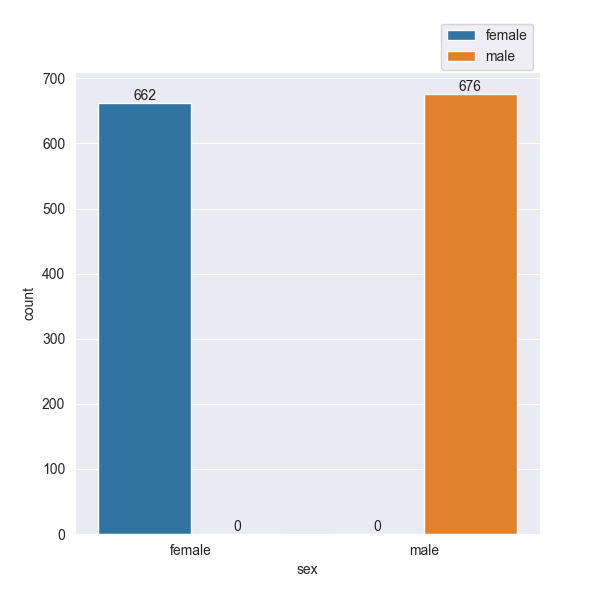

In [11]:
plt.close()
fig, ax = plt.subplots(ncols = 1, nrows= 1,  figsize = [6,6])
sns.countplot(data = df_med, x = 'sex', ax=ax, hue = 'sex');
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.legend(bbox_to_anchor = (1.0, 1.12), ncols = 1)

### Observation 
- There are 662 women and 676 men 

## Age

Skewness: 0.05567251565299186
kurtosis: -1.2450876526418673


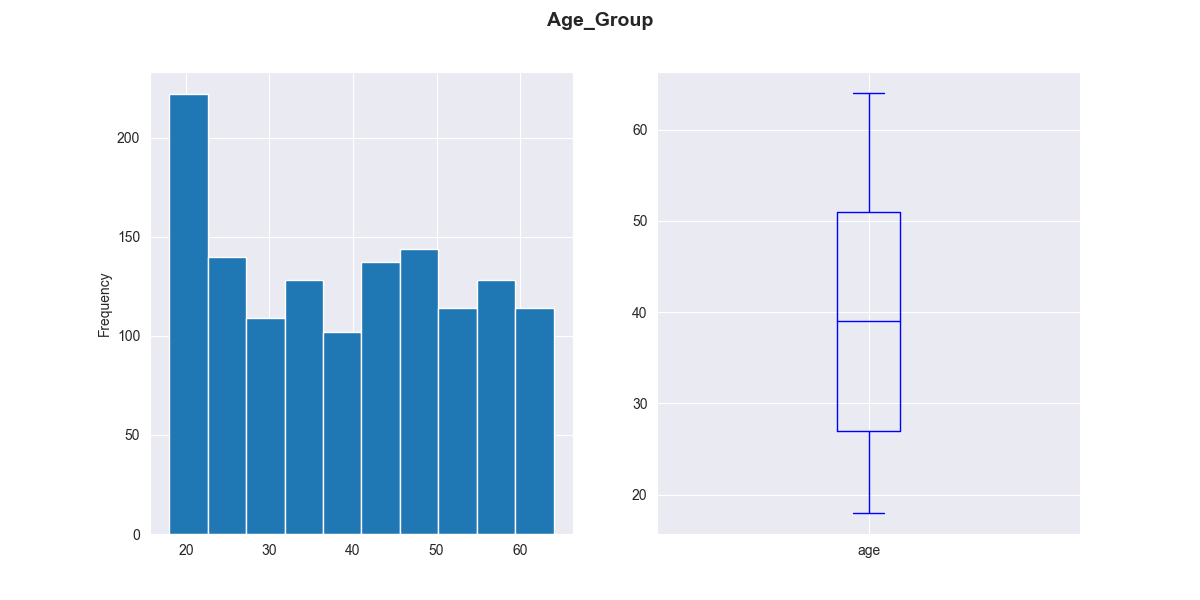

In [12]:
plt.close()
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = [12,6])
df_med['age'].plot(kind = 'hist', ax = ax[0])
df_med['age'].plot(kind = 'box', ax = ax[1], color = 'blue',  )
plt.suptitle(('Age_Group').title(), fontsize= 14, weight = 'bold')
print("Skewness:" , df_med['age'].skew())
print("kurtosis:" , df_med['age'].kurt())


### Observation
 The distribution of age is almost uniform with a mode value of 20

## BMI (Body Mass Index)

Text(0.5, 0.98, 'Bmi (Body Mass Index)')

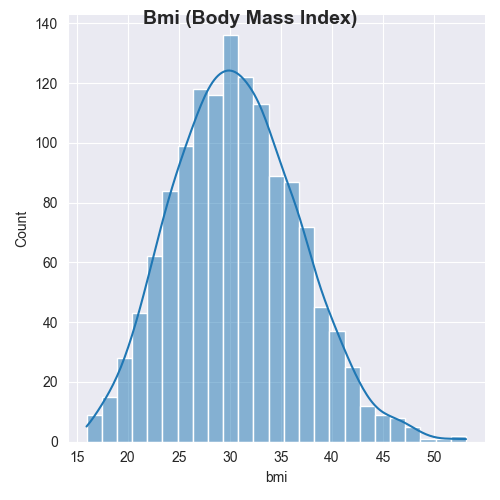

In [13]:
plt.close()
sns.displot(data= df_med, x= 'bmi', kde = True)
plt.suptitle(('BMI (Body Mass Index)').title(), fontsize= 14, weight = 'bold')

### Obsevartion

The BMI is shows a normal distribution for te variables with a  maximum of 30

## Charges

Skewness: 1.5158796580240388
kurtosis: 1.6062986532967907


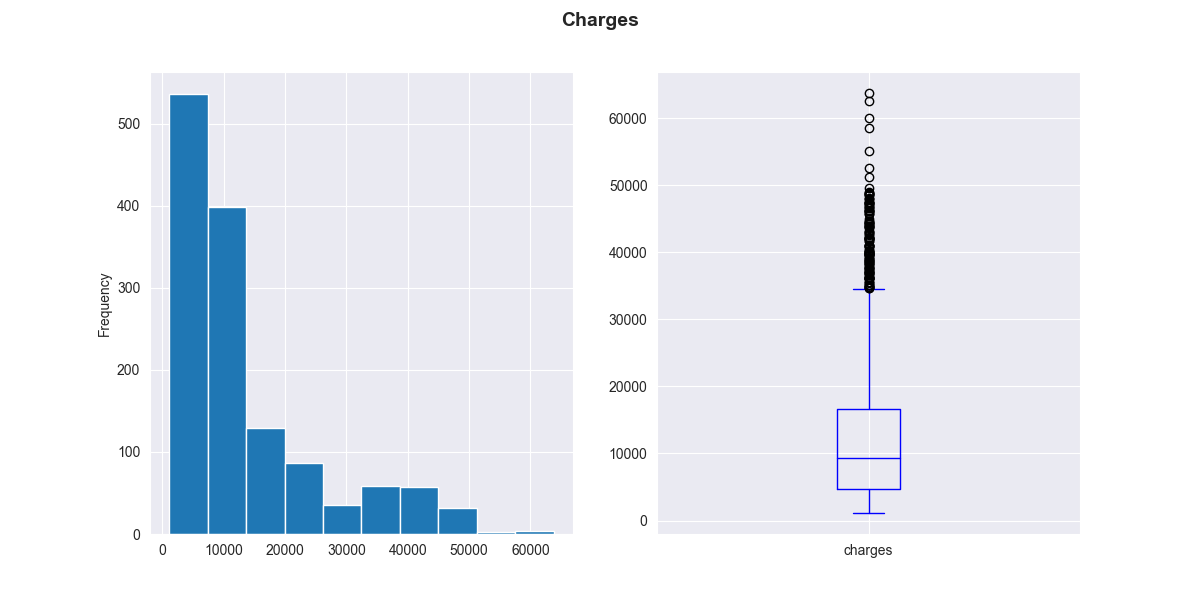

In [14]:
# Ploting a hist for charges
plt.close()
fig, ax = plt.subplots(ncols= 2, nrows=1, figsize = [12,6])
df_med['charges'].plot(kind = 'hist', ax = ax[0])
df_med['charges'].plot(kind = 'box', ax = ax[1], color = 'blue',  )
plt.suptitle(('Charges').title(), fontsize= 14, weight = 'bold')
print("Skewness:" , df_med['charges'].skew())
print("kurtosis:" , df_med['charges'].kurt())


### Observation
The charges is skewed right with  a long tail
- The General Trend seems to be a decrease in frequency as the charges increase
- Most of the prices fall between the \\$0 - \\$10,000 range

> This observation can be a result of other complications and age leading to higher charges and since the population is predominatly 18 - 21 less charges are being made 


## Smokers
Smokers as a categorical variable, with smokers and non - smokers  

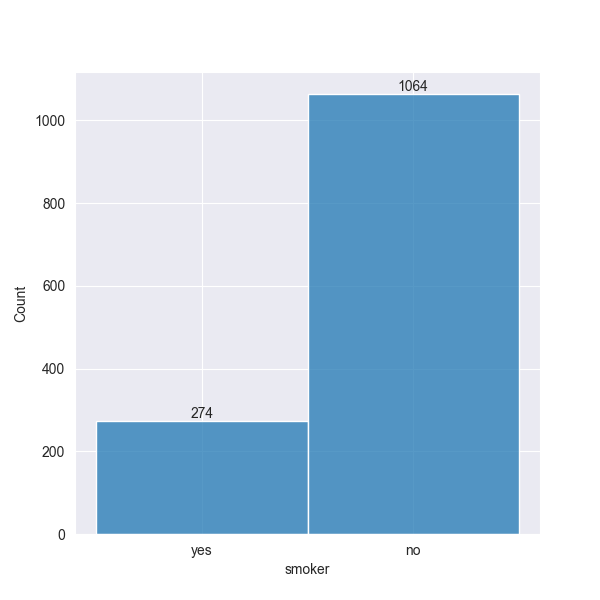

In [15]:
plt.close()
fig, ax = plt.subplots(ncols = 1, nrows= 1,  figsize = [6,6])
sns.histplot(data = df_med, x = 'smoker', ax = ax)
ax.bar_label(container=ax.containers[1], labels=[274, 1064]);

### Observation
- The number of non -  smokers is more than those of smokers, 

- Next i want to investigate the percentage of male and  female smokers

Text(0.5, 0.98, 'Smokers Vs Non-Smoker For Male And Female')

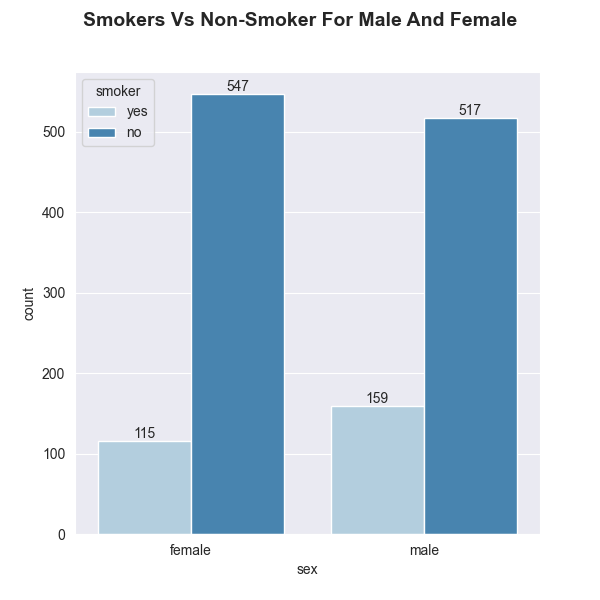

In [16]:
# Smokers by gender
plt.close()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [6,6])
sns.countplot(data = df_med, x = 'sex', hue = 'smoker', palette = 'Blues', ax=ax)
ax.bar_label(container=ax.containers[0], labels=[115,  159])
ax.bar_label(container=ax.containers[1], labels=[547, 517])
plt.suptitle(('Smokers VS non-Smoker for male and female').title(), fontsize= 14, weight = 'bold')


### Observation
- The chart shows the difference between male and female smokers with there being more male smokers 
- male 159
- female 115

Does smoking have an impact on the total medical charges??

Text(0.5, 0.98, 'Charges For Smokers Vs Non-Smokers For Male And Female')

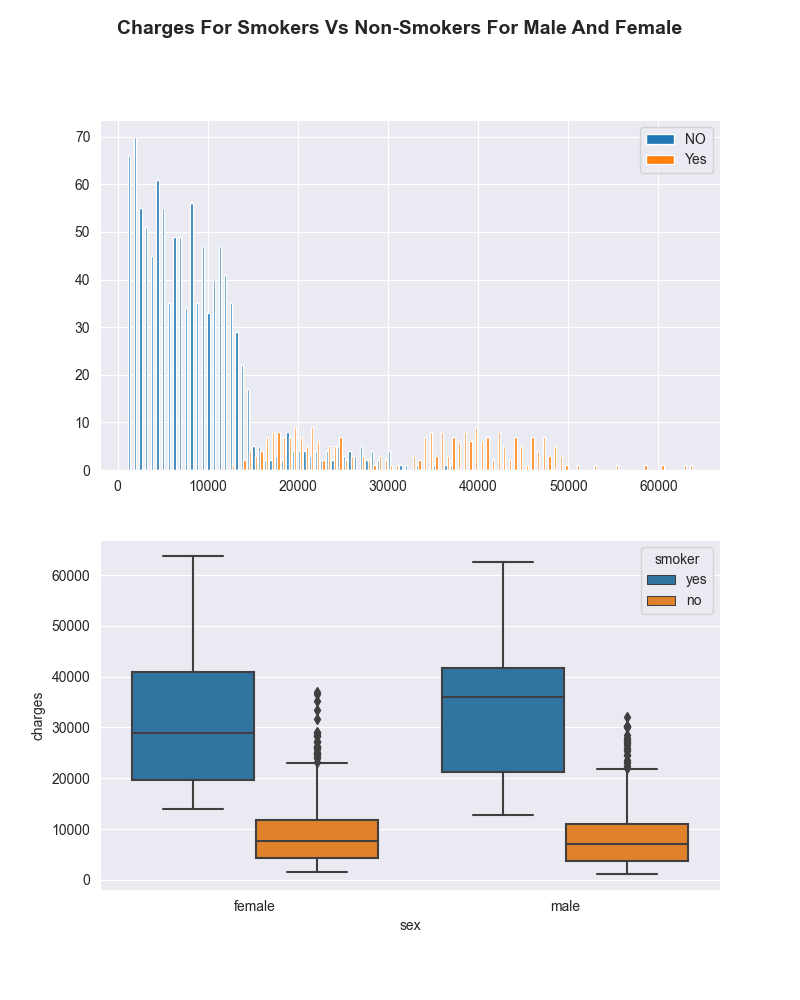

In [18]:
plt.close()
# creating  filter
a = df_med['smoker'] == 'yes'
x = df_med[a]['charges']
y = df_med[~a]['charges']

fig, ax =plt.subplots(nrows= 2, ncols= 1, figsize = [8,10])
ax[0].hist([y,x], bins= 100, label= ['NO', 'Yes']);
ax[0].legend()
#plt.title('Smokers vs non_smokers Medical_Charges', weight = 'bold' ax = ax[1])

sns.boxplot(data= df_med, x= 'sex', y= 'charges', hue= 'smoker', ax= ax[1])

plt.suptitle(('Charges For Smokers vs Non-smokers for Male and female').title(), fontsize= 14, weight = 'bold')

### Observation

from the charts above

It Appears this trend is also shown across sex, with smokers spending more than non-smoking for both sexes

> - male smokers appear to spend slightly more on medical bills with a median charge of just below \\$40,000 and female havig a median value just below \\$30,000

Text(0.5, 1.0, 'Medical_Charges for Smokers VS Non-smokers')

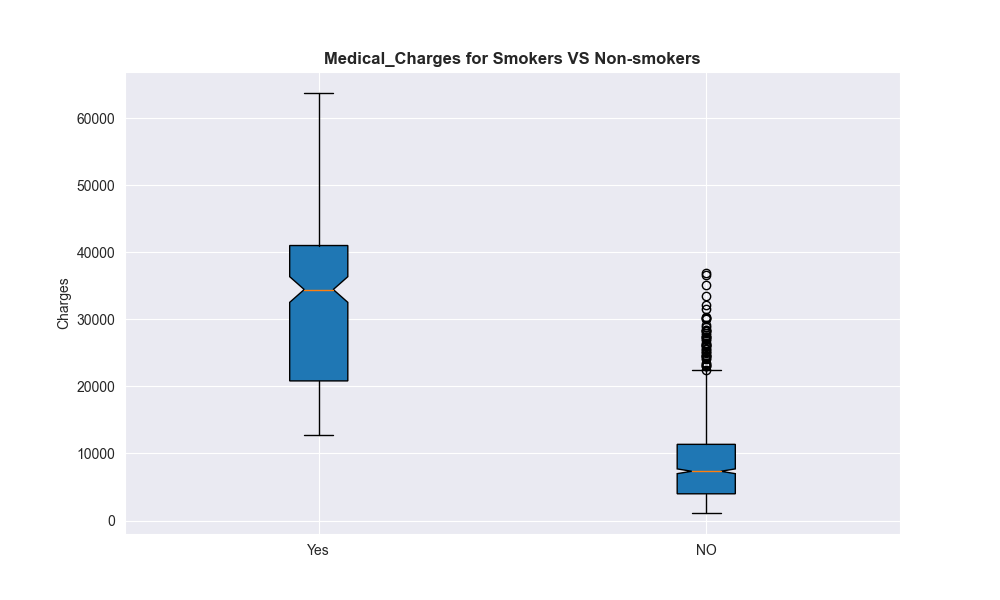

In [19]:
plt.close()
#creating Groupby object
mn = df_med.groupby('smoker')
mn['charges']

plt.boxplot([x,y], labels= ['Yes', 'NO'], notch= True, patch_artist= True, );
plt.ylabel('Charges')
plt.title('Medical_Charges for Smokers VS Non-smokers', weight = 'bold')

### Observation

> `Smokers` reportedly spend more money on insurance with majority of `smokers` an average of \\$35000 on medical care and `non-smokers` spending an average of \\$9000 on medical care 

Futher investigation is required to eleminate the possblity of this increase in medical bill is as a  result of increase in age 

<AxesSubplot: xlabel='age', ylabel='charges'>

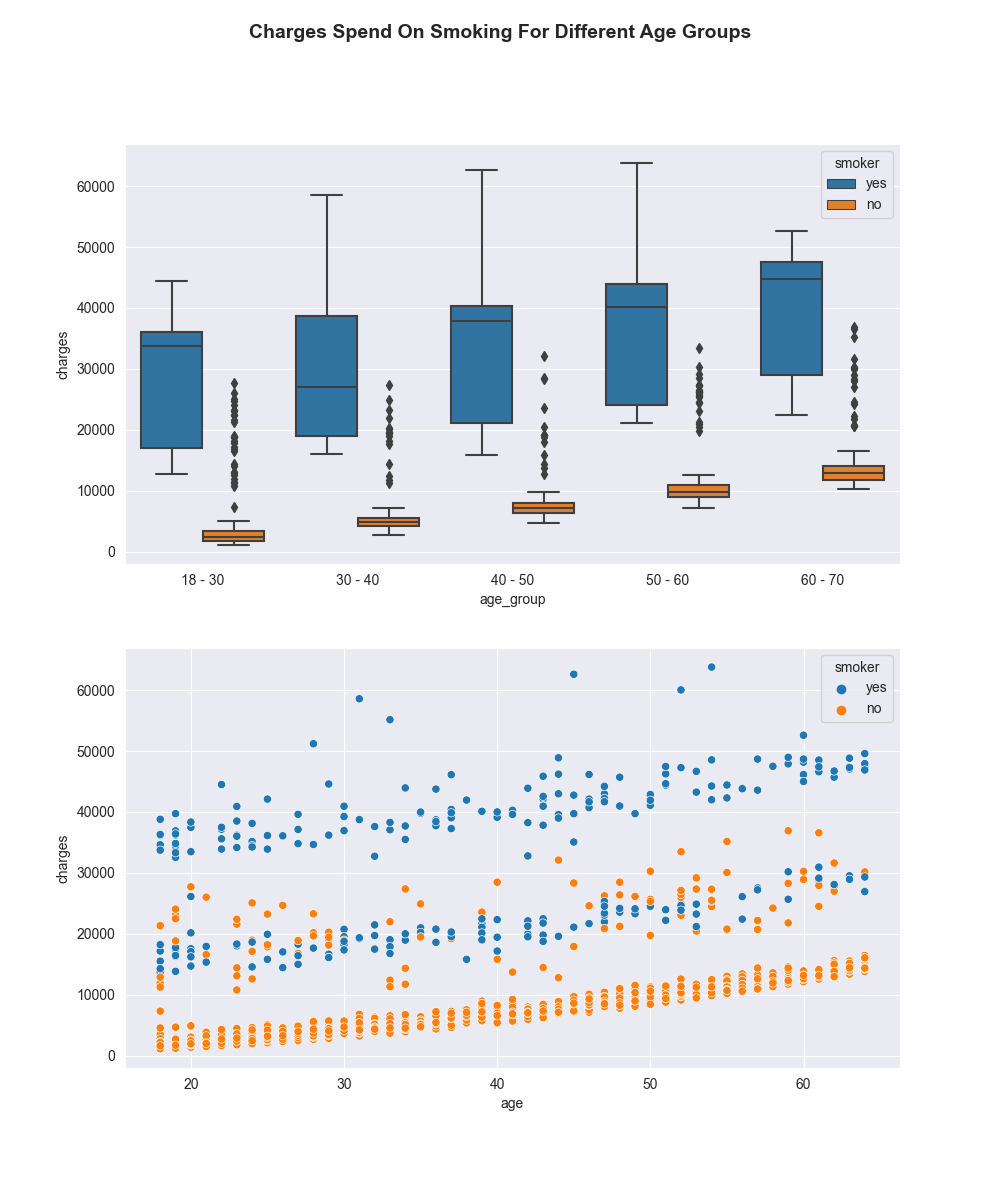

In [20]:
plt.close()
# cutting the into groups
labels = ["18 - 30", "30 - 40", "40 - 50", "50 - 60", "60 - 70"]
A = pd.cut(x= df_med['age'], bins= 5, labels=labels,  include_lowest = True)
df_med['age_group'] = A

fig, ax = plt.subplots(ncols= 1 , nrows= 2, figsize= [10,12])
sns.boxplot(data= df_med, x= 'age_group', y= 'charges', hue= 'smoker', ax= ax[0])

plt.suptitle(('Charges Spend on Smoking for Different age Groups').title(), fontsize= 14, weight = 'bold')

sns.scatterplot(data = df_med, x= 'age', y='charges', hue='smoker', ax = ax[1])

## Observation

we can make the following oservations from te chart above
- The General trend seem to be an increase in medical charge with age, as we might expect but there are variations with every age, which cannot be explained by age alone

- we can see three clusters of points from the chart above 
  1. The first consist of non-smokers with realtively low medical charges compared to others.
  2. The second cluster consist of a mixture of smokers and non - somikers,there a possility 
     these points can be outiers from two distinct overlapping clusters.
  3. The third consist of smokers with significantly higer medical charges


> The observation shows smokers spend sigificantly more than smokers with the median charge for non-smokers being under \\$10000 and the  median charges for smokers being close to \\$35000



## BMI (Body Mass Index)

> Exploring the relationship between BMI and charges 

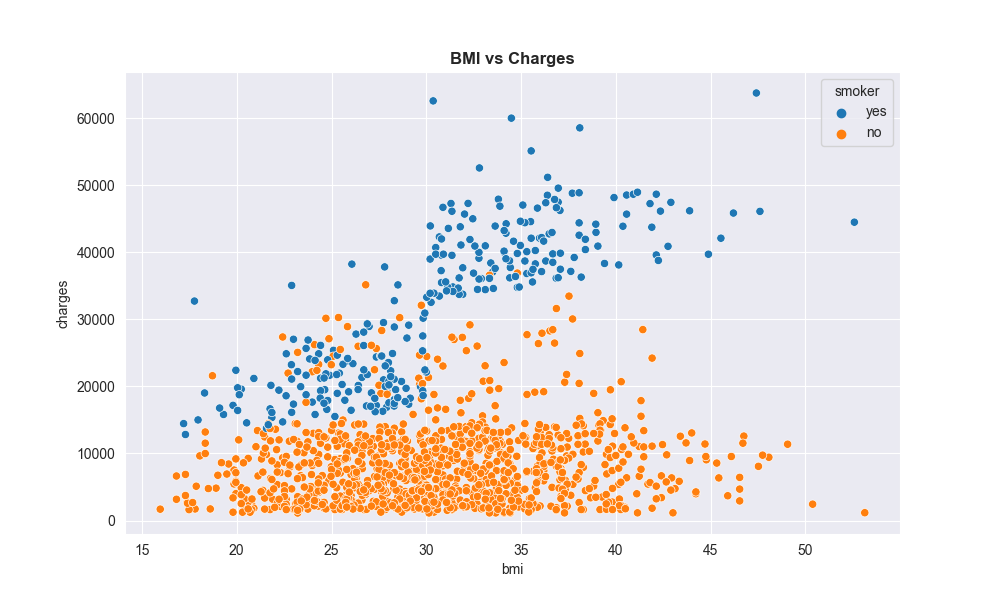

In [21]:
plt.close()
sns.scatterplot(data = df_med, x= 'bmi', y='charges', hue='smoker');
plt.title('BMI vs Charges', weight = 'bold');

### Oservation
>The General trend seeems to show no relationship between `BMI` and `Charges`, 
>- The variation in the chart appears to show a relationship for smokers and BMI, This Trend is not seen for non- smokers

 

# Correlation
> From the exploratory analysis, it is evident that some factors are closely correlated with each other than others, e.g charegs and health appear to grow togther charges and  BMI do not  

In [27]:
df_med.corr()['charges'].sort_values(ascending = False)[1:]

C:\Users\hp\AppData\Local\Temp\ipykernel_1408\1744199526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_med.corr()['charges'].sort_values(ascending = False)[1:]


age        0.299
bmi        0.198
children   0.068
Name: charges, dtype: float64

# Feature Engineering

In [29]:
#Creating a new Dataframe
df_med_numeric = df_med.copy()

Engineering the categorical features invloves assigning a numeric value to each state the variable <br/>

#### smoker
-  Smoker has to states `Yes` and `No` each state will e assigned a numeric variable
- `Yes` = 1 and `No` = 0


In [31]:
# Assiging values
smoker_values = {'no' : 0,
             'yes': 1}

df_med_numeric['smoker_numeric'] = df_med['smoker'].map(smoker_values)


In [32]:
df_med_numeric.corr()['charges'].sort_values(ascending = False)[1:]

C:\Users\hp\AppData\Local\Temp\ipykernel_1408\1444988115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_med_numeric.corr()['charges'].sort_values(ascending = False)[1:]


smoker_numeric   0.787
age              0.299
bmi              0.198
children         0.068
Name: charges, dtype: float64

`Smoker_numeric` shows strong positive correlation with charges with a correlation coefficent of 0.787

There are several observations between independent and dependent variables 
- `Smoker` shows a strong postive coreation with charges
- `BMI` and `Age` show very weak corelation with the independent variables 
- `Children` show no correlation with charges


Engineering the categorical features invloves assigning a numeric value to each state the variable <br/>

#### Sex
-  Sex has to states `Male` and `Female` each state will e assigned a numeric variable
- `male` = 1 and `female` = 0

In [34]:
#converting sex to a numerical variale with male = 1 and female = 0
sex_values = {'female' : 0,
             'male': 1}

df_med_numeric['sex_numeric'] = df_med['sex'].map(sex_values)


In [35]:
df_med_numeric.corr()['charges'].sort_values(ascending = False)[1:]

C:\Users\hp\AppData\Local\Temp\ipykernel_1408\1444988115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_med_numeric.corr()['charges'].sort_values(ascending = False)[1:]


smoker_numeric   0.787
age              0.299
bmi              0.198
children         0.068
sex_numeric      0.057
Name: charges, dtype: float64

`Sex` shows no correlation with charges with a correlation coefficent of 0.057

### Dummy Variables

<br/>
Dummy variables will be created for the region column, dummy variables are usually used to represent categorical variables with more than 2 levels

In [38]:
#Creaating Dummy Variables for the region column
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df_med[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [39]:
one_hot = enc.transform(df_med[['region']]).toarray()

In [40]:
# convertig region to numeric values
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [41]:
df_med_numeric[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [45]:
#sorting for correlation
df_med_numeric.corr()['charges'].sort_values(ascending= False)[1:]


C:\Users\hp\AppData\Local\Temp\ipykernel_1408\2303966744.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_med_numeric.corr()['charges'].sort_values(ascending= False)[1:]


smoker_numeric    0.787
age               0.299
bmi               0.198
southeast         0.074
children          0.068
sex_numeric       0.057
northeast         0.006
northwest        -0.040
southwest        -0.043
Name: charges, dtype: float64

`Region`(northeast, northwest, southeast, southwest)  are not correlated with charges 

From the dataset the only variables with a significant relatioship with the price is
- Age
- smoker_numeric
- bmi

In [46]:
#dropping the non-numeric coloumns
df_med_numeric = df_med_numeric.drop(['sex','region','smoker'], axis=1)

In [47]:
df_med_numeric.head(2)

,age,bmi,children,charges,age_group,smoker_numeric,sex_numeric,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.924,18 - 30,1,0,0.000,0.000,0.000,1.000
1,18,33.770,1,1725.552,18 - 30,0,1,0.000,0.000,1.000,0.000


In [48]:
#rearranging the postions of the columns
charge = df_med_numeric['charges']
children = df_med_numeric['children']
df_med_numeric = df_med_numeric.drop(['charges', 'children'], axis=1)

In [49]:
df_med_numeric['children'] = children
df_med_numeric['charges']= charge

In [51]:
df_med_numeric.head(2)

,age,bmi,age_group,smoker_numeric,sex_numeric,northeast,northwest,southeast,southwest,children,charges
0,19,27.900,18 - 30,1,0,0.000,0.000,0.000,1.000,0,16884.924
1,18,33.770,18 - 30,0,1,0.000,0.000,1.000,0.000,1,1725.552


In [52]:
# Dropping uncorrelated Features
# The required Features are age, bmi and smokers_numeric

df_med_numeric = df_med_numeric.drop(['age_group', 'sex_numeric', 'northeast',
                                      'northwest','southeast','southwest','children'], axis = 1)

In [53]:
df_med_numeric.head(5)

,age,bmi,smoker_numeric,charges
0,19,27.900,1,16884.924
1,18,33.770,0,1725.552
2,28,33.000,0,4449.462
3,33,22.705,0,21984.471
4,32,28.880,0,3866.855


In [78]:
#Creating a copy of the data numeric columns
df_med_numeric_training = df_med_numeric.copy()

In [79]:
#Converting df_med_numeric_training  to Numpy array
df_med_numeric_training = df_med_numeric_training.to_numpy()

In [80]:
df_med_numeric_training

array([[1.90000000e+01, 2.79000000e+01, 1.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 3.37700000e+01, 0.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 3.30000000e+01, 0.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 2.90700000e+01, 1.00000000e+00, 2.91413603e+04]])

In [61]:
#convert the dataset to a numpy array
y = df_med_numeric_training[:,-1]
X = df_med_numeric_training[:,:3]
print(X[2], y[2])

[28. 33.  0.] 4449.462


# Standardization of the Training Data
<br/>
Standardization is another scaling technique where the values are centred around the mean with unit standard deviation <br/>  <br/> 
This is putting the different values of the data on the same scale



In [81]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [82]:
print(X)

[[-1.43876426 -0.45332     1.97058663]
 [-1.50996545  0.5096211  -0.5074631 ]
 [-0.79795355  0.38330685 -0.5074631 ]
 ...
 [-1.50996545  1.0148781  -0.5074631 ]
 [-1.29636188 -0.79781341 -0.5074631 ]
 [ 1.55168573 -0.26138796  1.97058663]]


# Splitting the Dataset 
The dataset will be split into Predicting variables (`age`, `Bmi`, `smoker`) as X and Target Variable (`Charges`) as Y

In [84]:
#Splitting the data set for training and testing
from sklearn.model_selection import train_test_split

 #### We have seprated our data into Testing and Trains set 
-  The sample set consist of Predicting variables (`age`, `Bmi`, `smoker`) as X and Target Variable (`Charges`) as Y

-  This sample set will be divided into Training set for modelling the data and Testing Set for testing the data

-  The Training set X_train and y-Train 

- The testing set X_test  and Y_test

- The sample with be split 80 - 20 80% for training and 20% of the data for testing the model

In [85]:
#spliting the dataset
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size= 0.20, random_state= 1)

In [86]:
print(X_train.shape, y_train.shape)

(1070, 3) (1070,)


In [87]:
print(y_test.shape, X_test.shape)

(268,) (268, 3)


> The Training sample has 1070 rows and the test sample has 268 rows


# Create a regression Model
<br/> <br/>
Modelling the Data

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/>


In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
#Creating a regression object
linear_model = LinearRegression()

In [90]:
#Fitting the data
linear_model.fit(X_norm,y_train)

LinearRegression()

In [ ]:
X_test_norm = scaler.fit_transform(X_test)

In [91]:
predicted_charges = linear_model.predict(X_test)

<AxesSubplot: ylabel='Count'>

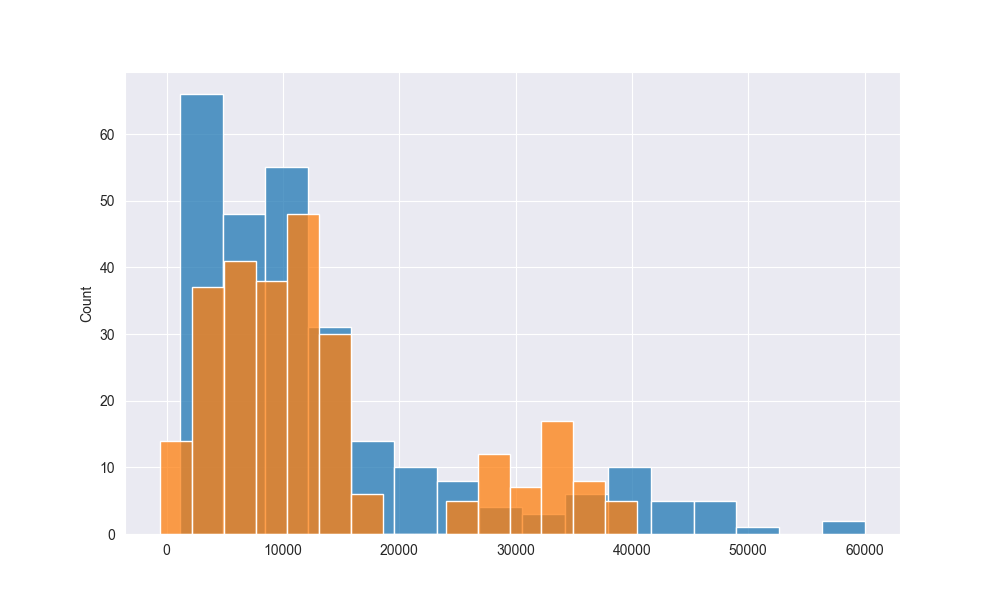

In [100]:
plt.close()
sns.histplot(x= y_test)
sns.histplot(x = predicted_charges)
#sns.scatterplot(x = y_test , y = predicted_charges)

In [101]:
# Creating a Variable weights to hold the weights and coeff of the model
weighs = dict(zip(df_med_numeric.columns, linear_model.coef_))

In [103]:
# Creating a dataframe to show the values
df_weights = pd.DataFrame(weighs, index= np.arange(0,1,1))
df_weights.T

,0
age,3615.997
bmi,1857.499
smoker_numeric,9587.723


### Testing 

Now that we've Trainned a model, we have to apply the test our model against our trained dataset,using te Root mean square error(rmse)

In [104]:
from sklearn.metrics import mean_squared_error

In [108]:
rms = mean_squared_error(y_test,predicted_charges)
print(np.sqrt(rms))

6024.862373502546


The model has a error of \\$6024.7 

# Conclusion

- The model performance was impacted on the variation between smokers and non - smokers 
- The Rsme was 6024
- 